# Lab: Decision Tree
## Hands-on demonstration CSC-481/681

## Payment Fraud Dataset

In [1]:
import pandas as pd
# Read in the data from the CSV file
df = pd.read_csv('payment_fraud.csv')
df.sample(10) #The label 0 indicates that this transaction is not fraudulent.

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,label
26018,2000,1,4.921318,storecredit,1063.962500,0
33655,539,1,4.748314,storecredit,0.001389,0
32781,2000,1,4.921349,creditcard,0.000000,0
3513,3,1,5.017904,paypal,0.000000,0
34424,153,1,4.886641,creditcard,0.000000,0
14253,3,1,4.524580,creditcard,2.634722,0
15252,602,1,4.962055,paypal,0.000000,0
28357,10,1,4.876771,creditcard,0.004861,0
29404,1866,1,5.034622,paypal,0.001389,0
27639,463,2,4.505662,creditcard,8.009722,0


In [2]:
# Convert categorical feature into dummy variables with one-hot encoding
df = pd.get_dummies(df, columns=['paymentMethod'])
df.sample(3)

,accountAgeDays,numItems,localTime,paymentMethodAgeDays,label,paymentMethod_creditcard,paymentMethod_paypal,paymentMethod_storecredit
17728,2000,1,4.895263,0.000000,0,1,0,0
36566,2,2,4.057414,0.000694,0,1,0,0
29517,2,1,4.524580,1.684722,0,1,0,0


In [3]:
from sklearn.model_selection import train_test_split
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop('label', axis=1), df['label'],
    test_size=0.2, random_state=17)

### Training decision trees

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Initialize classifier model
clf = DecisionTreeClassifier();

# Train the classifier model on training data (model fitting)
clf.fit(X_train, y_train);

#You can also combine above two lines to one line below
#clf = DecisionTreeClassifier().fit(X_train, y_train);

### Testing decision trees

In [5]:
# Make predictions on test data
y_pred = clf.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score
# Compare test set predictions with ground truth labels
print("Accuracy = %.3f" % (accuracy_score(y_pred, y_test)))

Accuracy = 1.000


# Iris Flower Dataset 

The **Iris flower** dataset consists of 50 samples from each of three species of Iris (Iris **setosa**, Iris **virginica** and Iris **versicolor**). Four features were measured from each sample: the length and the width of the sepals and petals, all in centimeters. Now let us build decision tree models to distinguish the species from each other based on the combination of these four features.

<table><tr>
<td> <img src="iris_images/setosa.jpg" alt="Drawing" style="height: 250px;"/> setosa </td>
<td> <img src="iris_images/virginica.jpg" alt="Drawing" style="height: 250px;"/>virginica </td>
<td> <img src="iris_images/versicolor.jpg" alt="Drawing" style="height: 250px;"/>versicolor </td>
</tr></table>

In [7]:
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target
fn = load_iris().feature_names
cn = load_iris().target_names

In [8]:
# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Controlling complexity of decision trees

In [9]:
iris_clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, max_leaf_nodes=3)
iris_clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(iris_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(iris_clf.score(X_test, y_test)))

Accuracy on training set: 0.958
Accuracy on test set: 0.967


In [10]:
iris_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5)
iris_clf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(iris_clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(iris_clf.score(X_test, y_test)))

Accuracy on training set: 0.967
Accuracy on test set: 1.000


## Visualizing decision tree using Matplotlib

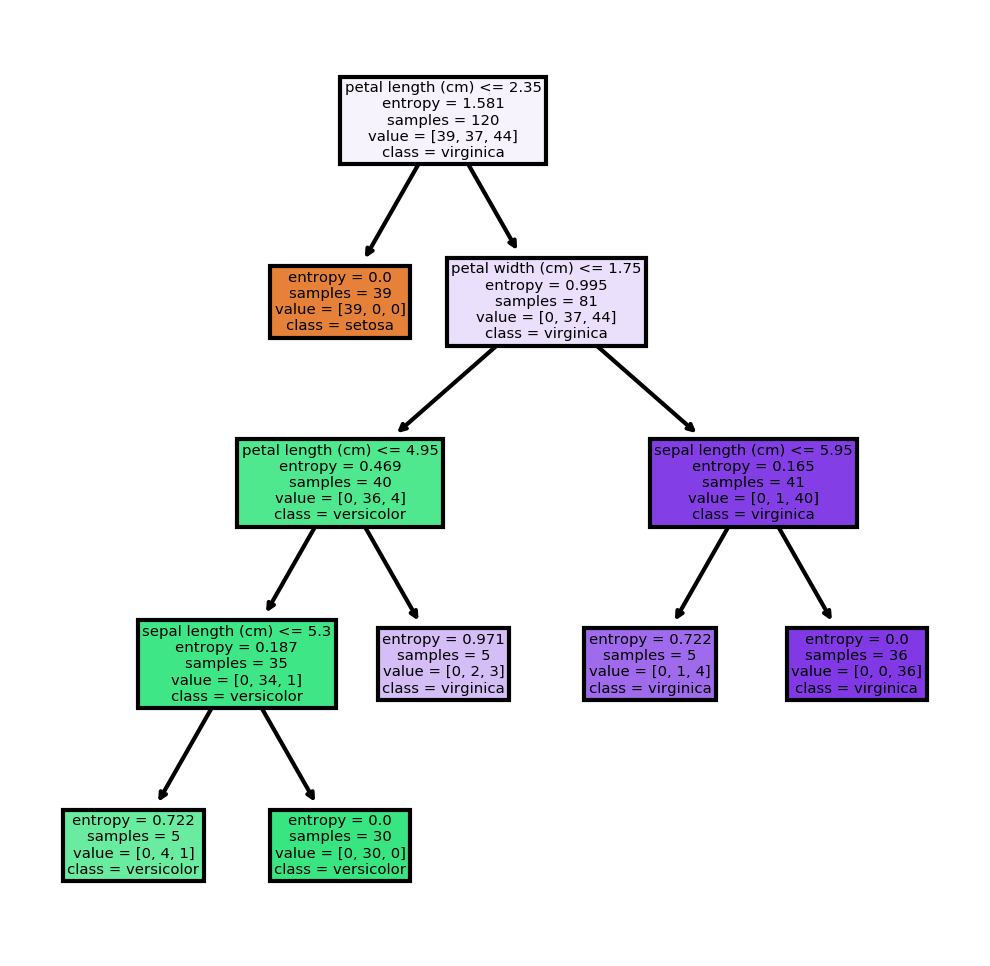

In [19]:
import matplotlib.pyplot as plt
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(iris_clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('tree_matplotlib.png')

## Visualizing decision tree using Graphviz

In [12]:
from sklearn.tree import export_graphviz
export_graphviz(iris_clf, out_file="tree_graphviz.dot", class_names=cn,
                feature_names=fn, impurity=False, filled=True)

**Graphviz** is an open source graph visualization software.

To install Graphviz, open a terminal/command prompt and enter the command: `conda install python-graphviz`

After that, you should be able to use the `dot` command below to convert the dot file into a png file:

`dot -Tpng tree.dot -o tree.png`


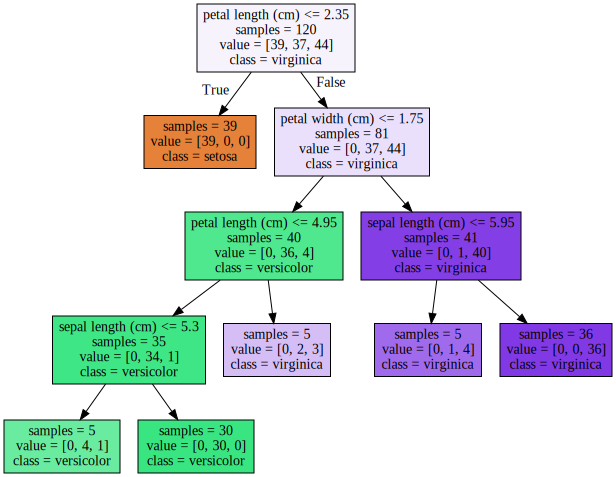

In [14]:
import graphviz
with open("tree_graphviz.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

## Important features in trees

In [15]:
importance = iris_clf.feature_importances_
print("Feature importances:")
for i,v in enumerate(importance):
    print('Feature: %s, Score: %.5f' % (fn[i],v))

Feature importances:
Feature: sepal length (cm), Score: 0.03442
Feature: sepal width (cm), Score: 0.00000
Feature: petal length (cm), Score: 0.65588
Feature: petal width (cm), Score: 0.30970


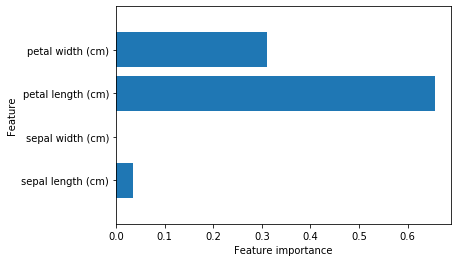

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def plot_feature_importances(model):
    n_features = X_test.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), fn)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(iris_clf)

# Lab2 Assignment: Decision Trees for Malware Classification
---
## Data:
- lab2.csv contains information of static analysis of 99 binary files. 50 files are benign/good and 49 are malicious/bad.
- The target variable is “label”: its value is either “good” or “bad”. 
- All other columns are features.

## Tasks:

- Task 1 (10 points): Build a decision tree classifier. Use 75% of the dataset for training and the remaining 25% for testing. Submit your best model in terms of prediction accuracy.
- Task 2 (10 points): What are the top 10 most informative features? Why?

## Deadline:
Submit your .ipynb by 23:59 pm (ET), Monday, Feb 8, 2021.

In [76]:
dat = pd.read_csv('lab2.csv')
dat.sample(10)

,check_sum,compile_date,datadir_IMAGE_DIRECTORY_ENTRY_BASERELOC_size,datadir_IMAGE_DIRECTORY_ENTRY_EXPORT_size,datadir_IMAGE_DIRECTORY_ENTRY_IAT_size,datadir_IMAGE_DIRECTORY_ENTRY_IMPORT_size,datadir_IMAGE_DIRECTORY_ENTRY_RESOURCE_size,debug_size,export_size,generated_check_sum,...,sec_vasize_upx3,size_code,size_image,size_initdata,size_uninit,std_section_names,total_size_pe,virtual_address,virtual_size,virtual_size_2
13,0,1013346937,0,0,16,60,0,0,0,59131,...,0.0,512,86016,0,0,1,25316,4096,81920,0
1,0,1218437803,0,0,468,100,1048,0,0,53913,...,0.0,4096,20480,12288,0,1,20480,4096,3346,2182
27,0,547200171,0,0,40,40,0,0,0,118045,...,0.0,13824,180224,43008,65536,0,85504,4096,13352,65536
20,73717,1301029282,1644,313,16,316,1290,0,313,73717,...,0.0,31232,81920,17408,0,0,49664,4096,13743,16994
76,143377,1383102936,1520,0,312,60,856,28,0,143377,...,0.0,54752,78272,22752,0,0,87296,768,51978,532
58,128742,1372384141,0,0,460,140,48496,28,0,128742,...,0.0,19456,86016,55808,0,1,82464,4096,19208,6264
23,0,1263808581,0,0,88,60,0,0,0,47155,...,0.0,39424,53248,2048,0,1,42496,4096,39086,586
44,0,1210974574,780,73,0,1652,924,0,73,95778,...,0.0,20480,98304,36864,16896,0,37888,4096,20052,9824
94,43954,1384313226,360,0,208,100,2596,28,0,58106,...,0.0,3072,24576,6144,0,1,18544,4096,2874,1844
42,0,708992537,0,0,0,3018,512,0,0,50174,...,0.0,39936,73728,7168,0,0,45568,4096,39936,140


In [166]:
X_train, X_test, y_train, y_test = train_test_split(dat.drop('label', axis=1), dat['label'],test_size=0.25, random_state=17)

In [167]:
dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtc.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


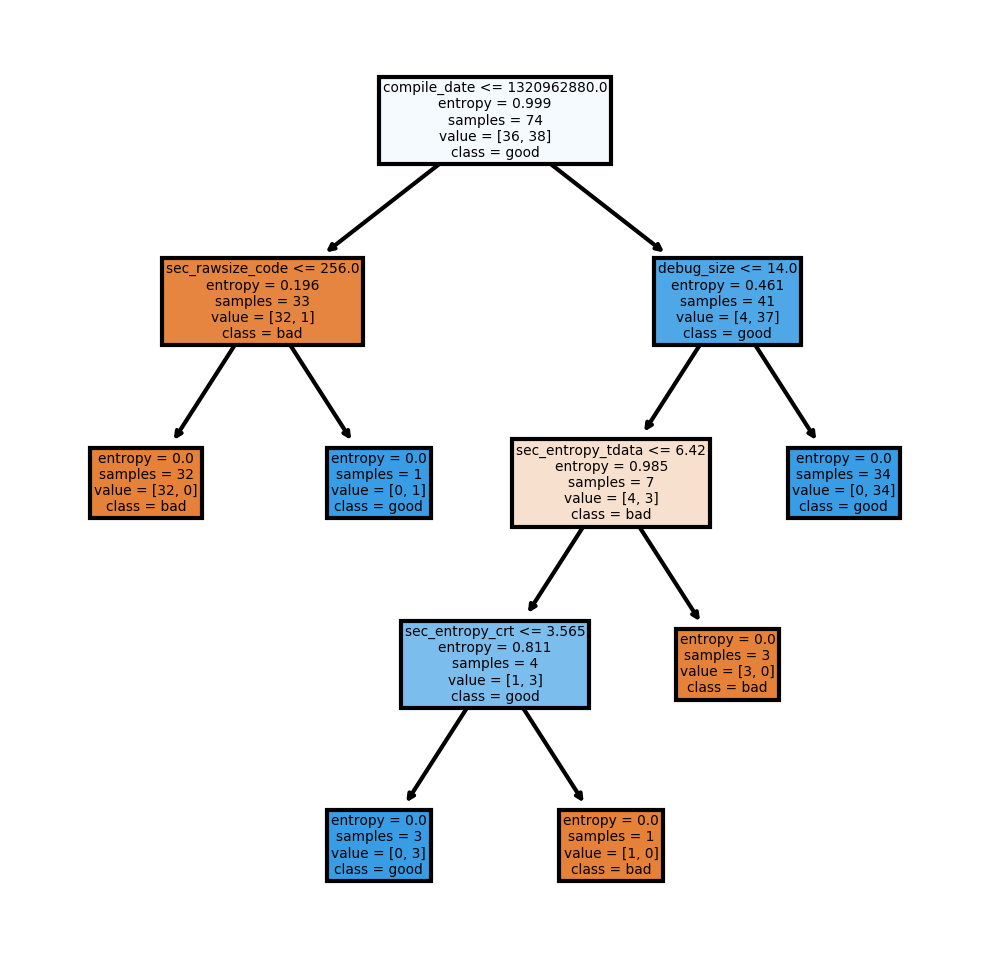

In [168]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dtc,
               feature_names = dat.columns.values, 
               class_names= ["bad", "good"],
               filled = True);
fig.savefig('lab2_matplotlib.png')

In [169]:
importance = dtc.feature_importances_
print("Feature importances:")
for i,v in enumerate(importance):
    if v > 0:
        print('Feature: %s, Score: %.5f' % (dat.columns.values[i],v))

Feature importances:
Feature: compile_date, Score: 0.65692
Feature: debug_size, Score: 0.16243
Feature: sec_entropy_crt, Score: 0.04388
Feature: sec_entropy_tdata, Score: 0.04937
Feature: sec_rawsize_code, Score: 0.08741


In [ ]:
# After playing around with the code I found the that prediction accuracy is highest when no constraints such as max_depth
# or max_leaf_nodes are added to the DecisionTreeClassifier() function. This observation make sense as the code is able to
# use less notable features to achieve 0 entropy across all leaf nodes.

# I also found that the random_state variable in the train_test_split() function plays a large role in the structure of the 
# decision tree, especially at higher depth. This observation would make sense as the random splitting of data may include or
# exclude harder to classify data points in the traing set. 

# I did consistently observe that the most important features across trees were compile_date and then debug_size. 
# Typically a tree will have the compile_date at its head then debug_size as a child to its right. Following from these nodes
# there will be a few other features that further divide the data